#  Collection of precalculations with data from *Fermi* and *Swift*.

       - collection of *Fermi* catalogues
       - Paths to Lightcurves from *Fermi*
       - Example plots for Lightcurves 
       - Test of outsourced functions 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 
from scipy.optimize import curve_fit

import csv
import astropy.units as u
from astropy.io import fits

from collections import OrderedDict

#  1 Fermi-LAT 4 year point source (3FGL)  

Attributes describing the spectrum of a gamma source so that it can be extrapolated into different energy ranges 
Important for that: 
- Fermi_name
- Counterpart_name
- Redshift (after merging the catalogues) 
- Pivot_energy ($E_0$) 
- Flux_densiry (K or f0) 
- $\alpha$
- $\beta$
- slope
- Spectrum type (PowerLaw, LogParabola)
- b
- $\gamma$ 
- $E_c$ Cutoff 

In [2]:
# merge catalogs, so redshift is in fermi 
fermi1 = pd.read_csv('Kataloge/3LAC_revised.csv')
fermi2 = pd.read_csv('Kataloge/3FGL_v16_revised.csv')

fermi1 = fermi1[['id', 'Fermi_name', 'Counterpart_name', 'Bzcat5_name', 'Optical_Class',
       'RA_J2000', 'Dec_J2000', 'Redshift', 'SED_Class', 'LogSyncZ',
       'Probability_Bayesian', 'Reliability_LR_RG', 'Reliability_LR_XG',
       'Significance', 'Flux_1to100GeV', 'Radio_flux)', 'X_Flux', 'USNOVmag', 'SDSSVmag',
       'CLEAN']]

fermi = pd.merge(left=fermi1, right=fermi2, how='left', left_on='Fermi_name', right_on='Source_Name')

## No 'Bursts' found in this catalog 

# 2. Fermi LAT GRB Catalog 

As .Fit-file found at _[Fermi_Home](https://heasarc.gsfc.nasa.gov/W3Browse/fermi/fermilgrb.html)_ <br>
List of GRBs detected by GBM and LAT:
- From 2008 to 2012 
- 28 GRBs over 100 MeV 
- 7 GRBs over 20 MeV 
Legend for all attributes online (see above) 

Can be used as comparison for brightness, duration, test statistics 

In [9]:
Datei = fits.open('Kataloge/LATGRB.fits',ignore_missing_end=True)
Headings = Datei['PRIMARY']
Katalog = Datei['FERMILGRB']
Katalog.data ## The whole entries 
Katalog.data['NAME'] ## one collumn 

Katdf = pd.DataFrame({'Name': Katalog.data['NAME'], 
                      'Time': Katalog.data['TIME'], 'Trig_Time': Katalog.data['TRIGGER_TIME'],
                      'RA': Katalog.data['RA'], 'DEC': Katalog.data['DEC'],
                      'Error_Radius': Katalog.data['ERROR_RADIUS'], 'Fluence': Katalog.data['FLUENCE'],
                      'Emax': Katalog.data['MAX_ENERGY'],
                     'PhotonMax': Katalog.data['MAX_ENERGY_PHOTON_NUMBER'],
                     'Max_Arrive': Katalog.data['MAX_ENERGY_ARRIVAL_TIME'],
                      'PhotonProb': Katalog.data['MAX_ENERGY_PHOTON_PROB'],
                     #'Best_Fit': Katalog.data['BEST_FITTING_MODEL']
                     })
Katdf

,DEC,Emax,Error_Radius,Fluence,Max_Arrive,Name,PhotonMax,PhotonProb,RA,Time,Trig_Time
0,-66.320,19.56,0.60,0.000222,24.83,GRB090926A,239,1.000,353.400,55100.180867,2.756316e+08
1,-62.050,0.79,1872.00,0.000006,12.08,GRB081006,10,0.955,136.320,54745.603867,2.449962e+08
2,-59.400,0.00,11268.00,0.000010,0.00,GRB100225A,0,0.000,310.300,55252.114943,2.887587e+08
3,-57.650,1.19,828.00,0.000029,79.75,GRB091031,7,0.999,71.490,55135.500333,2.786832e+08
4,-56.640,13.22,0.36,0.000179,16.54,GRB080916C,181,1.000,119.850,54725.008861,2.432168e+08
5,-54.210,1.45,1188.00,0.000018,0.22,GRB090720B,2,0.997,202.990,55032.710381,2.698022e+08
6,-50.910,0.27,2556.00,0.000008,3.77,GRB100620A,6,0.994,86.900,55367.119087,2.986951e+08
7,-50.819,0.00,3600.00,0.000000,0.00,GRB101014A,0,0.000,27.206,55483.174914,3.087223e+08
8,-41.715,5.32,0.72,0.000082,697.80,GRB090328,23,0.926,90.670,54918.400538,2.599258e+08
9,-38.500,1.73,720.00,0.000088,0.74,GRB110721A,22,0.998,333.200,55763.199811,3.329165e+08


A table of arrival times, maximum number of photons + energy and further characteristics for the 35 detected bursts <br>
Fit parameters in the corresponding paper

In [7]:
Katdf[Katdf['Name'].str.contains('090902')]


,DEC,Emax,Error_Radius,Fluence,Max_Arrive,Name,PhotonMax,PhotonProb,RA,Time,Trig_Time
27,27.324,33.39,3.6,0.000406,81.75,GRB090902B,276,0.949,264.94,55076.461902,2.735823e+08


# 3. *Fermi* GRBST - GBM Burst Catalog

Lots of other attributes for GRBs with the GLAST Burst Monitor / BBM to find _[here](https://heasarc.gsfc.nasa.gov/W3Browse/fermi/fermigbrst.html)_ <br>

No light curves, since like 3FGL table of bursts with properties. Therefore T90 time can be compared et


In [6]:
Datei = fits.open('Kataloge/GRBST.fits',ignore_missing_end=True)
Katalog = Datei['FERMIGBRST']

Tabelle = pd.DataFrame({'Name': Katalog.data['NAME'], 
                      'T50/s': Katalog.data['T50'], 'T90/s': Katalog.data['T90'],
                      'RA': Katalog.data['RA'], 'DEC': Katalog.data['DEC'],
                       'Fluence': Katalog.data['FLUENCE']
                     }) ## in spectrum.py as function with more parameters 
Models = Katalog.data['FLNC_BEST_FITTING_MODEL']
Times = Tabelle['T90/s']   
print('Shortest GRB in this catalog:',Tabelle.loc[Tabelle['T90/s'] == Tabelle['T90/s'].min()]['Name'],
      ', with duration: ' ,Tabelle['T90/s'].min() , 's')

print('Longest GRB in this catalog:',Tabelle.loc[Tabelle['T90/s'] == Tabelle['T90/s'].max()]['Name'],
      ', with the duration: ' ,Tabelle['T90/s'].max(), 's' )

Models

Shortest GRB in this catalog: 366    GRB141102112
Name: Name, dtype: object , with duration:  0.016 s
Longest GRB in this catalog: 588    GRB160625945
Name: Name, dtype: object , with the duration:  454.665 s


chararray(['FLNC_COMP', 'FLNC_PLAW', 'FLNC_COMP', 'FLNC_PLAW', 'FLNC_COMP',
           'FLNC_SBPL', 'FLNC_PLAW', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_PLAW',
           '', 'FLNC_BAND', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_PLAW',
           'FLNC_PLAW', 'FLNC_COMP', 'FLNC_BAND', 'FLNC_PLAW', '',
           'FLNC_PLAW', 'FLNC_COMP', '', 'FLNC_COMP', 'FLNC_COMP',
           'FLNC_COMP', 'FLNC_PLAW', 'FLNC_PLAW', 'FLNC_COMP', 'FLNC_COMP',
           'FLNC_COMP', 'FLNC_BAND', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP',
           'FLNC_PLAW', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_PLAW', 'FLNC_COMP',
           'FLNC_BAND', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_SBPL', '',
           'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP',
           'FLNC_PLAW', 'FLNC_SBPL', 'FLNC_COMP', 'FLNC_PLAW', 'FLNC_PLAW',
           'FLNC_COMP', '', 'FLNC_BAND', 'FLNC_COMP', 'FLNC_COMP',
           'FLNC_PLAW', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_PLAW', 'FLNC_COMP',
           'FLNC_COMP', 'FLNC_COMP', 'FLNC_COMP', 'FLNC_B

# 4.  Lightcurves from ASDC : daily and sadly not minutely 

## Lightcurves from *Fermi* Analysis 

Found here _[***Fermi* results**](https://fermi.gsfc.nasa.gov/ssc/data/access/)_ 

### 1) LAT Data Server 

15843571 85398


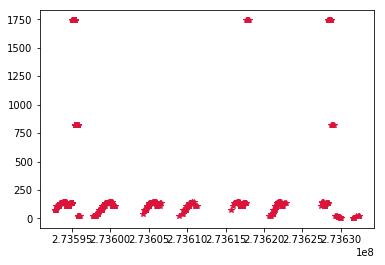

In [15]:
# 1) LAT Data Server 
Datei = fits.open('FERMI/DataServer_Photon.fits',ignore_missing_end=True)
Info = Datei['PRIMARY']
Events = Datei['EVENTS']
t = Events.data['TIME']
E = Events.data['EVENT_ID']
Events.data['EVENT_TYPE']
Events.data
## Event in energy and time components 
print(E.max(), E.min())
hist = plt.hist(E, bins=20,log=True)
plt.xscale('log')
plt.xlabel('Energy') ; plt.ylabel('Frequency')
plt.clf()


len(t) #3377
Freq = hist[0]
En = hist[1]
for i in range(0,len(t)):
    Ei = E[i]
    index = np.argmax(En>Ei)-1
    if index >= 20 :
        print('IF')
        index -=1
    F  = Freq[index]
    plt.plot(t[i],F,'*',color='crimson')
#plt.plot(t,Freq)

### 2.) List of LAT GRBs announced via CGN notices

= Huge table with GRBs and link to data from Swift and Fermi, partly also finished Lightcurves 
& Skymap with the locations of the GRBs <br>

Table to **GRB Explorer**, then data available there; GBM Quicklook with Lightcurve, *Swift* Forward to *Swift* Result (in SWIFT notebook), GBM Data <br> <br> <br>
In **GBM DATA** again some files, partly with **_LC**, then Lightcurves, but only as **.gif** or **.pdf** of this form, which would be super suitable after all 


<img src="http://polar.ihep.ac.cn/grb/2017/02/GRB170206A/lc/POLAR_lc_grb170206A.png", alt ="T" , title= "T" />

Filename: FERMI/LLE_GRBs/GRB090902/LLE/gll_pha_bn090902462_v01.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      43   ()      
  1  SPECTRUM      1 BinTableHDU     99   50R x 3C   [I, J, E]   
  2  EBOUNDS       1 BinTableHDU     62   50R x 3C   [I, E, E]   
  3  GTI           1 BinTableHDU     57   1R x 2C   [D, D]   


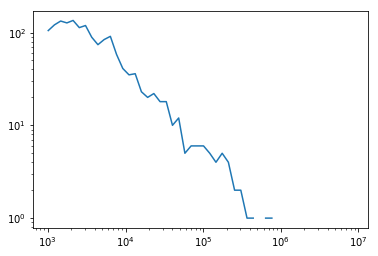

In [18]:
Datei = fits.open('FERMI/LLE_GRBs/GRB090902/LLE/gll_pha_bn090902462_v01.fit',ignore_missing_end=True)
Datei.info()  ##Spectrum Ebounds GTI 
Spec = Datei['SPECTRUM'] ## Counts vs Channal 
C = Spec.data['CHANNEL']
N = Spec.data['COUNTS']
plt.plot(C,N)
plt.clf()

Bound = Datei['EBOUNDS'] ## Channal vs Energie 
C_cal = Bound.data['CHANNEL']
Min = Bound.data['E_MIN']
Max = Bound.data['E_MAX']


plt.plot((Max-Min)/2,N)
plt.yscale('log') ; plt.xscale('log')

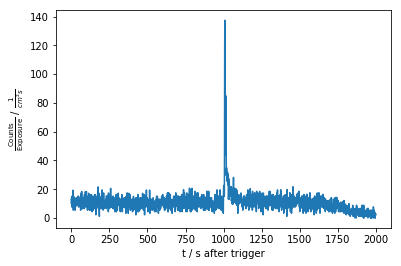

In [19]:
from Lightcurve import plot_LAT_LC, save_LAT_txt
% matplotlib inline
plot_LAT_LC('FERMI/LLE_GRBs/gll_cspec_bn090902462_v01.pha')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn090902462_v01.pha', 'DATA/LC/LAT_090902')

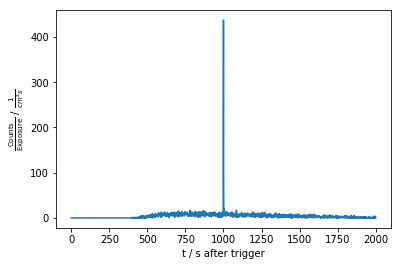

In [5]:
plot_LAT_LC('FERMI/LLE_GRBs/gll_cspec_bn110721200_v02.pha')

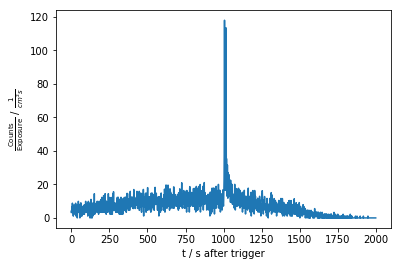

In [4]:
plot_LAT_LC('FERMI/LLE_GRBs/gll_cspec_bn120911268_v02.pha')

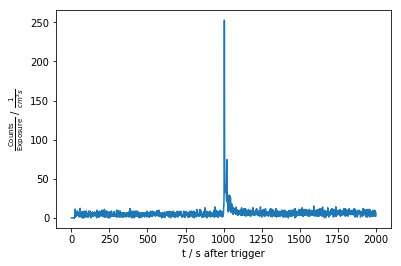

In [6]:
plot_LAT_LC('FERMI/LLE_GRBs/gll_cspec_bn080916009_v10.pha')

In [5]:
## .txts 2008
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn080825593_v06.pha', 'DATA/LC/LAT_080825')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn080916009_v10.pha', 'DATA/LC/LAT_080916')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn081024891_v04.pha', 'DATA/LC/LAT_081024')
# 2009
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn090217206_v01.pha', 'DATA/LC/LAT_090217')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn090323002_v01.pha', 'DATA/LC/LAT_090323')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn090510016_v01.pha', 'DATA/LC/LAT_090510')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn090902462_v01.pha', 'DATA/LC/LAT_090902')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn090926181_v01.pha', 'DATA/LC/LAT_090926')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn091031500_v01.pha', 'DATA/LC/LAT_091031')

# 2010
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn100116897_v01.pha', 'DATA/LC/LAT_100116')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn100724029_v04.pha', 'DATA/LC/LAT_100724')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn100826957_v01.pha', 'DATA/LC/LAT_100826')

# 2011
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn110328520_v02.pha', 'DATA/LC/LAT_110328')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn110529034_v01.pha', 'DATA/LC/LAT_110529')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn110721200_v02.pha', 'DATA/LC/LAT_110721')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn110731465_v01.pha', 'DATA/LC/LAT_110731')

# 2012
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn120226871_v01.pha', 'DATA/LC/LAT_120226')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn120328268_v00.pha', 'DATA/LC/LAT_120328')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn120709883_v00.pha', 'DATA/LC/LAT_120709')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn120911268_v02.pha', 'DATA/LC/LAT_120911')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn121011469_v01.pha', 'DATA/LC/LAT_121011')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn121225417_v01.pha', 'DATA/LC/LAT_121225')

# 2013
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn130305486_v00.pha', 'DATA/LC/LAT_130305')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn130310840_v02.pha', 'DATA/LC/LAT_130310')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn130427324_v02.pha', 'DATA/LC/LAT_130427')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn130518580_v00.pha', 'DATA/LC/LAT_130518')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn130821674_v01.pha', 'DATA/LC/LAT_130821')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn131014215_v02.pha', 'DATA/LC/LAT_131014')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn131108862_v02.pha', 'DATA/LC/LAT_131108')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn131231198_v04.pha', 'DATA/LC/LAT_131231')

# 2014
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn140102887_v04.pha', 'DATA/LC/LAT_140102')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn140110263_v04.pha', 'DATA/LC/LAT_140110')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn140206275_v02.pha', 'DATA/LC/LAT_140206')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn140619475_v00.pha', 'DATA/LC/LAT_140619')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn141028455_v03.pha', 'DATA/LC/LAT_141028')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn141207800_v00.pha', 'DATA/LC/LAT_141207')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn141222298_v02.pha', 'DATA/LC/LAT_141222')

# 2015
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn150510139_v01.pha', 'DATA/LC/LAT_150510')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn150523396_v01.pha', 'DATA/LC/LAT_150523')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn150902733_v00.pha', 'DATA/LC/LAT_150902')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn151006413_v01.pha', 'DATA/LC/LAT_151006')
# 2016
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn160816730_v01.pha', 'DATA/LC/LAT_160816')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn160905471_v01.pha', 'DATA/LC/LAT_160905')
save_LAT_txt('FERMI/LLE_GRBs/gll_cspec_bn160910722_v00.pha', 'DATA/LC/LAT_160910')

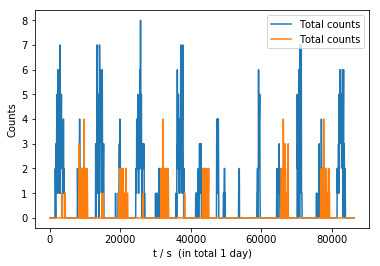

In [11]:
## Solare Flares 
from Lightcurve import plot_LC_solar_Flare
% matplotlib inline
plot_LC_solar_Flare('FERMI/SolarFlares/lat_LC_20180102.fits')
plot_LC_solar_Flare('FERMI/SolarFlares/LAT_Flares/lat_LC_20131010.fits')

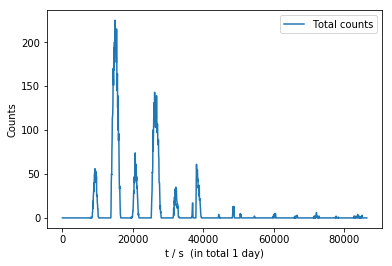

In [21]:
from Lightcurve import plot_LC_solar_Flare
% matplotlib inline 
## Solare Flare 2012-03-07   highest sigma event 
plot_LC_solar_Flare('FERMI/SolarFlares/LAT_Flares/lat_LC_20120307.fits', 'Flare20120307')

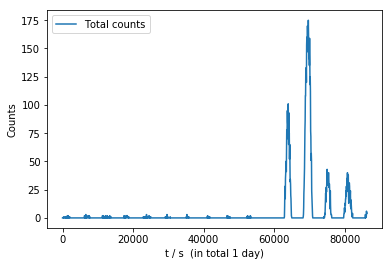

In [4]:
## Solar Flare 2017-09-10 
plot_LC_solar_Flare('FERMI/SolarFlares/LAT_Flares/lat_LC_20170910.fits','Flare20170910')

# -------------------------------------------------------------------------------------------------------------
# *SWIFT* 
Sattelit since 2004 in orbit (600 km altitude), solar powered, for the investigation of gamma flashes 
- BAT** = **B**urst **A**lert **T**elescope (15-150 kev): Localizes bursts
- XRT** = **X**-**r**ay **T**elescope (reddening range; up to some kev): afterglow observation 
- UVOT** = **U**ltra**V**violett/**O**ptical **T**elescope : Accuracy of localization 

### Generel Problem
*Swift* data not uniformly stored. In fits-files sometimes WHITE useful, sometimes RATE, sometimes only a certain section interesting <br> ---> Almost everything has to be viewed manually until **.txt** files with flow against time are created, which can be worked with..... 


# 1. *Swift* Data at Quicklook Results 

The data can be found on a_[Quick-Look-Page](https://swift.gsfc.nasa.gov/cgi-bin/sdc/ql?)_ with a light curve as soon as the comments **lightcurve** in the results indicate 
(**<font color='yellow'>yellow</font>** Points for data with light curves ) 
<br>
The downloaded data must be read out with fits: 

Filename: SWIFT/GRB130727/GRB130727.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     108   ()      
  1  RATE          1 BinTableHDU    318   1536R x 5C   [D, 4D, 4D, J, D]   
  2  EBOUNDS       1 BinTableHDU    300   4R x 3C   [I, E, E]   
  3  STDGTI        1 BinTableHDU    143   3R x 2C   [D, D]   


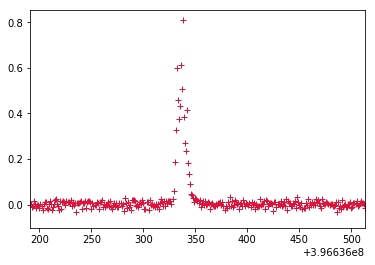

In [23]:
Datei = fits.open('SWIFT/GRB130727/GRB130727.lc',ignore_missing_end=True)
Datei.info()
Head = Datei['RATE'].header
Rate = Datei['RATE']
T = Rate.data['TIME']
R = Rate.data['RATE']
ax = plt.figure() 
Ratesum = np.zeros(len(T))
for i in range(0,len(T)):
    Rate = R[i]
    Ratesum[i] = Rate.sum()
plt.plot(T,Ratesum,'+',color='crimson')

ax = plt.gca()
#ax.ticklabel_format(useOffset=False)


plt.xlim(T[100], T[len(T)-2650])
data = np.array([T[100:len(T)-2650],Ratesum[100:len(T)-2650]]) ; data = data.T
text = 'Left column = Time after Trigger in seconds & Right column = # Counts'
np.savetxt('DATA/LC_SWIFT/%s.txt'%('130727'),data, fmt=['%f','%f'],header=text )

Filename: SWIFT/GRB180102a/tdrss1.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      33   ()      
  1  TDRSS_LC      1 BinTableHDU    141   212R x 9C   [1D, 1D, 1D, 4J, 4E, 4E, 1J, 1E, 1E]   
  2  TDRSS_LC2     1 BinTableHDU    176   665R x 9C   [1D, 1D, 1D, 4J, 4E, 4E, 1J, 1E, 1E]   


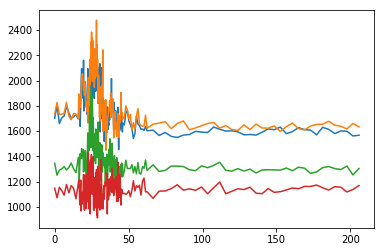

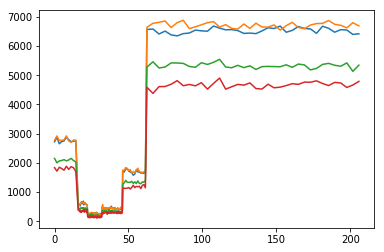

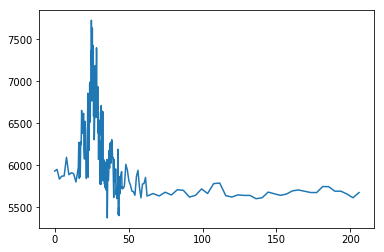

In [24]:
Datei = fits.open('SWIFT/GRB180102a/tdrss1.lc',ignore_missing_end=True)
Datei.info()
LC = Datei['TDRSS_LC']
LC.data['TOT_RATE']

T = LC.data['TIME']
T = T-T[0]
R = LC.data['RATE']
Raw  =LC.data['RAW_COUNTS']
TR = LC.data['TOT_RATE']

plt.plot(T,R)
plt.show()

plt.plot(T,Raw)
plt.show()

plt.plot(T,TR)

<br><br><br><br><br><br><br><br><br><br>

# 2. *Swift*  Daten from Analysis-Results
On the NASA *SWIFT*-Homepage under _[**results**](https://swift.gsfc.nasa.gov/results/)_ some Data Products (2004-2018) for fast transients / bursts are linked: 
- GRB Table = search mask for GRB names, catalog similar to *Fermi* (Zeit,T90,Redshift,RA/DEC,Flue)
- BAT enhanced GRB Data produrct catalog = table with link to Quick look plots and data; In **.lc** folder as **.gif**, **.txt**, **.fits** 
- *Swift* Burst results = high level data for triggers of BAT / XRT / UVOT, therefore divided into 4 subranges; First general time and name, then BAT results, XRT results and UVOR results in the above file formats 
- XRT Products for Afterglow = table with light curves, data, spectra of GRB afterglows sorted by years 


Downloading data from points 2 and 3 



## A.  BAT Burst Catalog 

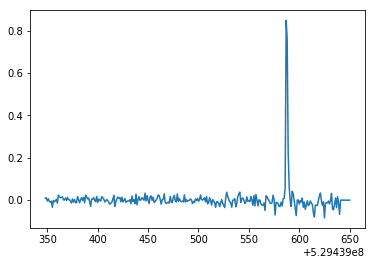

In [25]:
from Lightcurve import plot_LC_file 
from Lightcurve import save_SWIFT_txt
plot_LC_file('SWIFT/GRB171011/sw00778154000b_bb_1s.lc', False)
save_SWIFT_txt('SWIFT/GRB171011/sw00778154000b_bb_1s.lc', '171011_BAT')

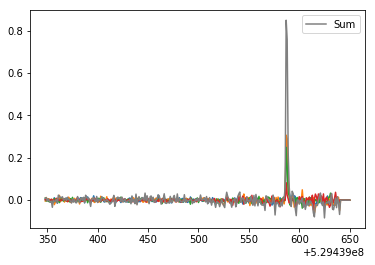

In [26]:
plot_LC_file('SWIFT/GRB171011/sw00778154000b_4chan_1s.lc',True)

### ---> 4chan_1s.lc = Secondwise lightcurve in 4 energy ranges
### ---> _1s.lc = Secondswise Lighcurve as additon of the energy ranges  
<br><br><br><br> 
## 2. Swift Burst Ground Analysis 
The BAT subcategory contains a **.txt** with 11 columns: Time and rate plus errors per energy interval (5 times) <br>
A line above the data entries indicates the trigger time (MET), the date and the name of the burst

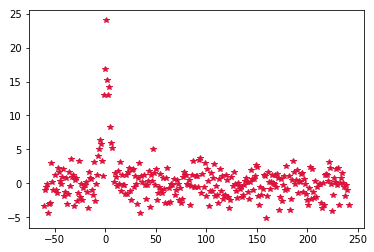

In [27]:
t,RE1,RE11,RE2,RE22,RE3,RE33,RE4,RE44,RE5,RE55 = np.genfromtxt('SWIFT/GRB180102a/64sec.txt', unpack=True, skip_header=1)
i = 0 
#vernünftiger coden 
while i < len(RE1)-16: ## Dann circa 1 Sekunde pro Eintrag 
    Sum = 0
    Sum += RE1[i]+RE1[1+i]+RE1[2+i]+RE1[3+i]+RE1[4+i]+RE1[5+i]+RE1[6+i]+RE1[7+i]+RE1[8+i]+RE1[9+i]+RE1[10+i]+RE1[11+i]+RE1[12+i]+RE1[13+i]+RE1[14+i]+RE1[15+i]
    Sum += RE2[i]+RE2[1+i]+RE2[2+i]+RE2[3+i]+RE2[4+i]+RE2[5+i]+RE2[6+i]+RE2[7+i]+RE2[8+i]+RE2[9+i]+RE2[10+i]+RE2[11+i]+RE2[12+i]+RE2[13+i]+RE2[14+i]+RE2[15+i]
    Sum += RE3[i]+RE3[1+i]+RE3[2+i]+RE3[3+i]+RE3[4+i]+RE3[5+i]+RE3[6+i]+RE3[7+i]+RE3[8+i]+RE3[9+i]+RE3[10+i]+RE3[11+i]+RE3[12+i]+RE3[13+i]+RE3[14+i]+RE3[15+i]
    Sum += RE4[i]+RE4[1+i]+RE4[2+i]+RE4[3+i]+RE4[4+i]+RE4[5+i]+RE4[6+i]+RE4[7+i]+RE4[8+i]+RE4[9+i]+RE4[10+i]+RE4[11+i]+RE4[12+i]+RE4[13+i]+RE4[14+i]+RE4[15+i]
    Sum += RE5[i]+RE5[1+i]+RE5[2+i]+RE5[3+i]+RE5[4+i]+RE5[5+i]+RE5[6+i]+RE5[7+i]+RE5[8+i]+RE5[9+i]+RE5[10+i]+RE5[11+i]+RE5[12+i]+RE5[13+i]+RE5[14+i]+RE5[15+i]
    
    plt.plot(t[i],Sum,'*',color='crimson')
    i +=16
    
#plt.plot(t,RE5,color='grey')
plt.show()